# Importing Library Tools

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import pickle
import seaborn as sns
import numpy as np

# Data Preprocessing

In [11]:
df = pd.read_csv('UK_DATA_SET.csv')
df = df[df.engineSize != 0]
df = df[df.year != 1970]
df = df[df.year != 2060]
df = df[df.mpg < 100]
df = df[df.mpg > 1]
df.model = df.model.str.lstrip()

In [12]:
le_df = df
le_y = le_df.price
le_x = le_df.drop('price',axis=1)

# Label Encoding

In [ ]:
label_encoder = preprocessing.LabelEncoder()
le_df['brand'] = label_encoder.fit_transform(le_df['brand'])
le_df['model'] = label_encoder.fit_transform(le_df['model'])
le_df['transmission'] = label_encoder.fit_transform(le_df['transmission'])
le_df['fuelType'] = label_encoder.fit_transform(le_df['fuelType'])

# One Hot Encoding

In [13]:
ohe = OneHotEncoder()
cols = ['brand', 'model', 'transmission','fuelType' ]
ohe.fit(le_x[cols])
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_), cols), remainder = 'passthrough')

# Splitting Dataframe

In [14]:
le_x_train, le_x_valtest, le_y_train, le_y_valtest = train_test_split(le_x,le_y,test_size=0.2)
le_x_val, le_x_test, le_y_val, le_y_test = train_test_split(le_x_valtest,le_y_valtest,test_size=0.5)

# Data Visualization

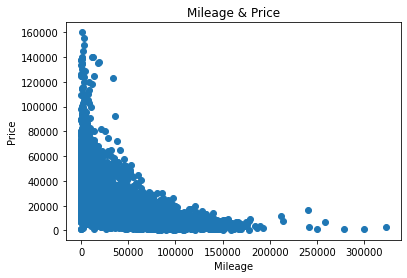

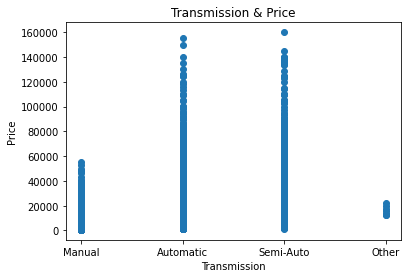

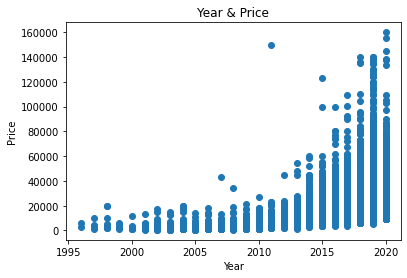

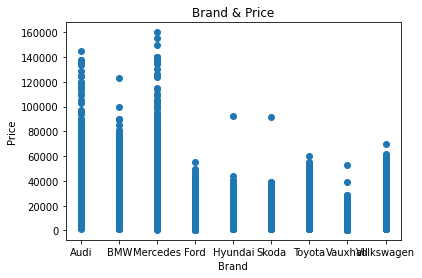

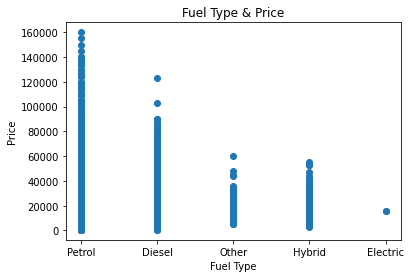

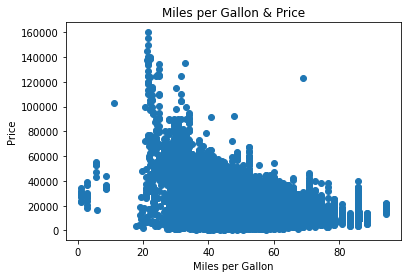

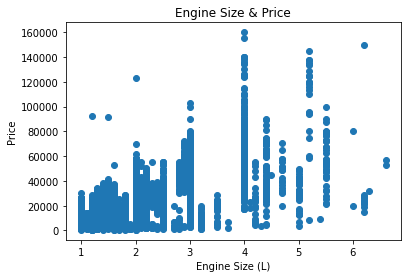

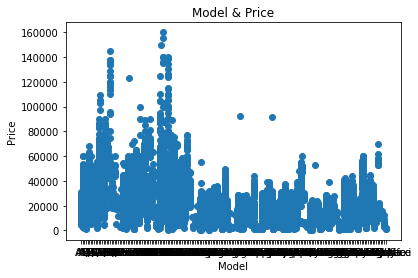

In [6]:
x=df['mileage']
y=df['price']
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage & Price')
plt.scatter(x,y)
plt.show()

x=df['transmission']
y=df['price']
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.title('Transmission & Price')
plt.scatter(x,y)
plt.show()

x=df['year']
y=df['price']
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Year & Price')
plt.scatter(x,y)
plt.show()

x=df['brand']
y=df['price']
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Brand & Price')
plt.scatter(x,y)
plt.show()

x=df['fuelType']
y=df['price']
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Fuel Type & Price')
plt.scatter(x,y)
plt.show()

x=df['mpg']
y=df['price']
plt.xlabel('Miles per Gallon')
plt.ylabel('Price')
plt.title('Miles per Gallon & Price')
plt.scatter(x,y)
plt.show()

x=df['engineSize']
y=df['price']
plt.xlabel('Engine Size (L)')
plt.ylabel('Price')
plt.title('Engine Size & Price')
plt.scatter(x,y)
plt.show()

x=df['model']
y=df['price']
plt.xlabel('Model')
plt.ylabel('Price')
plt.title('Model & Price')
plt.scatter(x,y)
plt.show()

# Correlation Heatmap

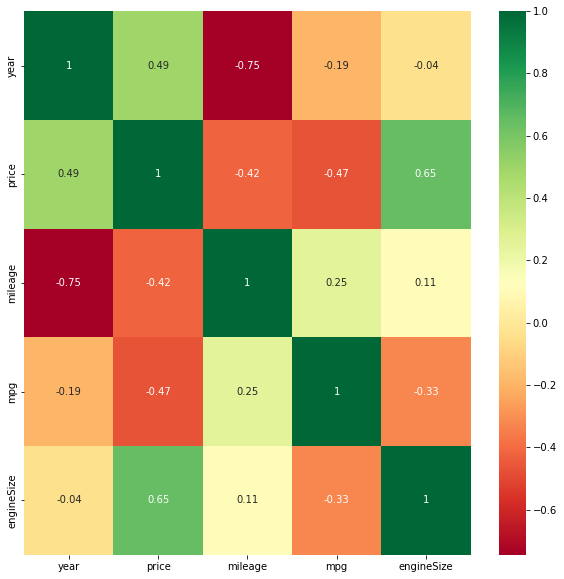

In [15]:
corrmat = le_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Linear Regression

In [8]:
lr = LinearRegression()
lr_pipe = make_pipeline(column_trans, lr)
lr_pipe.fit(le_x_train,le_y_train)
lr_result = lr_pipe.predict(le_x_test)
print("R2: ", r2_score(le_y_test,lr_result))

R2:  0.8579141459370045


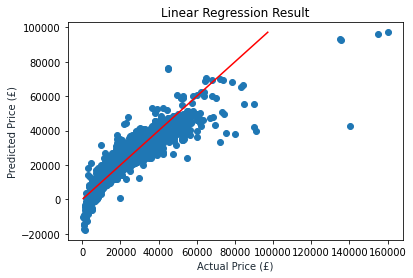

In [9]:
xx = np.linspace(le_y_valtest.min(),lr_result.max(),lr_result.shape[0])
yy = xx
plt.scatter(le_y_test, lr_result)
plt.plot(xx, yy, '-r')
plt.title('Linear Regression Result')
plt.xlabel('Actual Price (£)', color='#1C2833')
plt.ylabel('Predicted Price (£)', color='#1C2833')
plt.show()

# Gradient Boosting Regressor

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=300)
gbr_pipe = make_pipeline(column_trans, gbr)
gbr_pipe.fit(le_x_train,le_y_train)
gbr_result = gbr_pipe.predict(le_x_test)
print("R2: ", r2_score(le_y_test,gbr_result))

R2:  0.9363471462760781


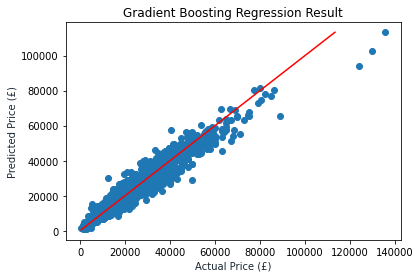

In [17]:
xx = np.linspace(le_y_valtest.min(),gbr_result.max(),gbr_result.shape[0])
yy = xx
plt.scatter(le_y_test, gbr_result)
plt.plot(xx, yy, '-r')
plt.title('Gradient Boosting Regression Result')
plt.xlabel('Actual Price (£)', color='#1C2833')
plt.ylabel('Predicted Price (£)', color='#1C2833')
plt.show()

# Random Forest Regression

In [18]:
rfr = RandomForestRegressor(n_estimators = 100)
rfr_pipe = make_pipeline(column_trans, rfr)
rfr_pipe.fit(le_x_train,le_y_train)
rfr_result = rfr_pipe.predict(le_x_test)
print("R2: ", r2_score(le_y_test,rfr_result))

R2:  0.9662497504243782


In [ ]:
xx = np.linspace(le_y_valtest.min(),rfr_result.max(),rfr_result.shape[0])
yy = xx
plt.scatter(le_y_test, rfr_result)
plt.plot(xx, yy, '-r')
plt.title('Random Forest Regression Result')
plt.xlabel('Actual Price (£)', color='#1C2833')
plt.ylabel('Predicted Price (£)', color='#1C2833')
plt.show()

In [ ]:
filename = 'karworth_rfr_model.pkl'
pickle.dump(lr_pipe, open(filename, 'wb'))

# ANN (Keras Sequential Model)

In [ ]:
ann = Sequential([
    Dense(32, activation='relu', input_shape=(8,)),
    Dense(64, activation='relu'),
    Dense(1,),
])
ann.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mse']
)
ann_history = ann.fit(
    le_x_train, le_y_train,
    batch_size=10, epochs=2,
    validation_data=(le_x_val, le_y_val)
)

In [ ]:
ann_result = ann.predict(le_x_test)
print("R2: ", r2_score(le_y_test,ann_result))


In [ ]:
xx = np.linspace(le_y_valtest.min(),ann_result.max(),ann_result.shape[0])
yy = xx
plt.scatter(le_y_test, ann_result)
plt.plot(xx, yy, '-r')
plt.title('ANN Result')
plt.xlabel('Actual Price (£)', color='#1C2833')
plt.ylabel('Predicted Price (£)', color='#1C2833')
plt.show()